In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# code_path = Path(__file__)
code_path = Path(r'C:\Users\tianc\OneDrive\Documents\SIG\DISES\code\MPI')
datafd_path = code_path.parent.parent / 'data' / 'MPI' 
outfd_path = code_path.parent.parent / 'output'

### cluster-level MPI based on Cambodia DHS 2014

In [3]:
spatial_res = 'clust'
mpi_df = pd.read_csv(outfd_path / 'data' / f'mpi_khm_dhs14_{spatial_res}.csv')

In [4]:
mpi_df.shape

(611, 2)

(array([213., 120.,  97.,  58.,  61.,  36.,  18.,   7.,   0.,   1.]),
 array([0.        , 0.07183719, 0.14367438, 0.21551157, 0.28734876,
        0.35918595, 0.43102314, 0.50286033, 0.57469752, 0.64653471,
        0.7183719 ]),
 <BarContainer object of 10 artists>)

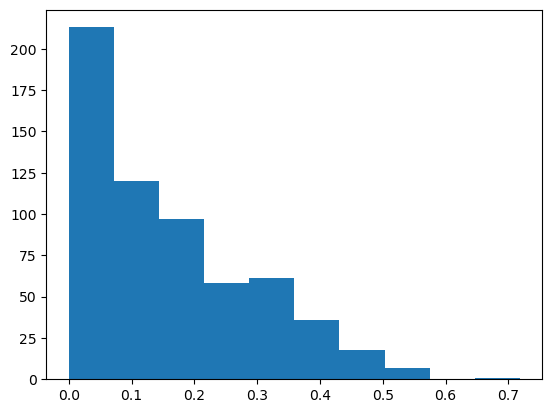

In [7]:
plt.hist(mpi_df.mpi)

#### 0 MPI

In [8]:
mpi_df.loc[mpi_df.mpi == 0, :]  # 86 clusters have 0 MPI

,clust_no,mpi
4,5,0.0
14,15,0.0
16,17,0.0
27,28,0.0
28,29,0.0
...,...,...
587,588,0.0
591,592,0.0
593,594,0.0
594,595,0.0


In [20]:
mpi0_clusters = mpi_df.loc[mpi_df.mpi == 0, 'clust_no']
mpi0_clusters

4        5
14      15
16      17
27      28
28      29
      ... 
587    588
591    592
593    594
594    595
599    600
Name: clust_no, Length: 86, dtype: int64

##### inspect 1 cluster

In [9]:
i = 5
clust5_mpi_df = pd.read_stata(
    datafd_path / 'dta' / f'khm_dhs14_mpi_{spatial_res}{i}.dta')
clust5_mpi_df.head(2)

,hh_id,ind_id,psu,strata,subsample,weight,area,region,region_01,agec4,...,g01_k_elec_1,g01_k_toilet_1,g01_k_water_1,g01_k_house_1,g01_k_fuel_1,g01_k_asset_1,MPI_1_20,MPI_1_33,MPI_1_50,MPI_1
0,50002,5000201,5,banteay meanchey - urban,selected,0.209528,urban,Banteay Meanchay,Banteay Meanchay,18-59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.080808,0.0,0.0,0.0
1,50002,5000202,5,banteay meanchey - urban,selected,0.209528,urban,Banteay Meanchay,Banteay Meanchay,18-59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.080808,0.0,0.0,0.0


In [12]:
clust5_mpi_df.columns.to_list()

['hh_id',
 'ind_id',
 'psu',
 'strata',
 'subsample',
 'weight',
 'area',
 'region',
 'region_01',
 'agec4',
 'agec2',
 'headship',
 'd_cm',
 'd_nutr',
 'd_satt',
 'd_educ',
 'd_elct',
 'd_wtr',
 'd_sani',
 'd_hsg',
 'd_ckfl',
 'd_asst',
 'd_cm_01',
 'd_nutr_01',
 'd_satt_01',
 'd_educ_01',
 'd_elct_01',
 'd_wtr_01',
 'd_sani_01',
 'd_hsg_01',
 'd_ckfl_01',
 'd_asst_01',
 'clust_no',
 'edu_1',
 'atten_1',
 'cm_1',
 'nutri_1',
 'elec_1',
 'toilet_1',
 'water_1',
 'house_1',
 'fuel_1',
 'asset_1',
 'sample_1',
 'per_sample_weighted_1',
 'per_sample_1',
 'g01_edu_1',
 'g01_atten_1',
 'g01_cm_1',
 'g01_nutri_1',
 'g01_elec_1',
 'g01_toilet_1',
 'g01_water_1',
 'g01_house_1',
 'g01_fuel_1',
 'g01_asset_1',
 'raw1_edu_1',
 'raw1_atten_1',
 'raw1_cm_1',
 'raw1_nutri_1',
 'raw1_elec_1',
 'raw1_toilet_1',
 'raw1_water_1',
 'raw1_house_1',
 'raw1_fuel_1',
 'raw1_asset_1',
 'w1_edu_1',
 'w1_atten_1',
 'w1_cm_1',
 'w1_nutri_1',
 'w1_elec_1',
 'w1_toilet_1',
 'w1_water_1',
 'w1_house_1',
 'w1_fuel_

In [13]:
clust5_mpi_df.shape

(66, 107)

In [14]:
clust5_mpi_df.sample_1.mean()

1.0

In [16]:
clust5_mpi_df.weight.unique()

array([0.209528])

In [18]:
clust5_mpi_df.c_vector_1.value_counts()  # no one is mpi poor

0.222222    24
0.055556    24
0.000000    18
Name: c_vector_1, dtype: int64

##### inspect all clusters

In [31]:
# check if MPI=0 simply b/c cluster has no poor ppl.
tocheck_clusters = []
for clust_no in mpi0_clusters:
    clust_mpi_df = pd.read_stata(
        datafd_path / 'dta' / 
        f'khm_dhs14_mpi_{spatial_res}{clust_no}.dta')
    mpi_k20 = clust_mpi_df.MPI_1_20.unique()
    assert len(mpi_k20) == 1
    mpi_k20 = mpi_k20[0]
    if mpi_k20 > 0:  # MPI=0 b/c cluster has no poor ppl.
        pass
    else:  # TO CHECK: clusters have 0 mpi_k20
        # all ppl. have score < 20?
        print(f'{clust_no}: {mpi_k20}')
        tocheck_clusters.append(clust_no)

15: 0.0
72: 0.0
224: 0.0
226: 0.0
229: 0.0
230: 0.0
231: 0.0
232: 0.0
233: 0.0
236: 0.0
245: 0.0
247: 0.0
350: 0.0
381: 0.0
484: 0.0
564: 0.0
592: 0.0


In [48]:
# check clusters that have 0 mpi_k20:
# all/some ppl. used to calc. MPI, MPI=0 b/c none is poor
for clust_no in tocheck_clusters:
    clust_mpi_df = pd.read_stata(
        datafd_path / 'dta' / 
        f'khm_dhs14_mpi_{spatial_res}{clust_no}.dta')
    print(clust_no)
    print(clust_mpi_df.shape[0])  # total no. of ppl.
    display(clust_mpi_df[['sample_1',  # in subsample (used)
                          'per_sample_weighted_1',  # % no missing
                          'per_sample_1',  # % no missing
                          'c_vector_1']].describe())  # score
    print()


15
81


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,81.0,81.0,81.0,81.000000
mean,1.0,1.0,1.0,0.070645
std,0.0,0.0,0.0,0.066905
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



72
57


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,57.000000,5.700000e+01,5.700000e+01,53.000000
mean,0.929825,9.298248e-01,9.298248e-01,0.013627
std,0.257713,1.804034e-07,1.804034e-07,0.024132
min,0.000000,9.298246e-01,9.298246e-01,0.000000
25%,1.000000,9.298246e-01,9.298246e-01,0.000000
50%,1.000000,9.298246e-01,9.298246e-01,0.000000
75%,1.000000,9.298246e-01,9.298246e-01,0.000000
max,1.000000,9.298246e-01,9.298246e-01,0.055556



224
60


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,60.0,60.0,60.0,60.000000
mean,1.0,1.0,1.0,0.002778
std,0.0,0.0,0.0,0.012210
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.000000
max,1.0,1.0,1.0,0.055556



226
52


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,52.000000,5.200000e+01,5.200000e+01,46.000000
mean,0.884615,8.846156e-01,8.846156e-01,0.030193
std,0.322603,2.407447e-07,2.407447e-07,0.060526
min,0.000000,8.846154e-01,8.846154e-01,0.000000
25%,1.000000,8.846154e-01,8.846154e-01,0.000000
50%,1.000000,8.846154e-01,8.846154e-01,0.000000
75%,1.000000,8.846154e-01,8.846154e-01,0.000000
max,1.000000,8.846154e-01,8.846154e-01,0.166667



229
80


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,80.000000,8.000000e+01,8.000000e+01,73.000000
mean,0.912500,9.124993e-01,9.124993e-01,0.026636
std,0.284349,7.197684e-07,7.197684e-07,0.057905
min,0.000000,9.125000e-01,9.125000e-01,0.000000
25%,1.000000,9.125000e-01,9.125000e-01,0.000000
50%,1.000000,9.125000e-01,9.125000e-01,0.000000
75%,1.000000,9.125000e-01,9.125000e-01,0.000000
max,1.000000,9.125000e-01,9.125000e-01,0.166667



230
62


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,62.000000,6.200000e+01,6.200000e+01,54.000000
mean,0.870968,8.709678e-01,8.709678e-01,0.053498
std,0.337972,6.009122e-08,6.009122e-08,0.073166
min,0.000000,8.709677e-01,8.709677e-01,0.000000
25%,1.000000,8.709677e-01,8.709677e-01,0.000000
50%,1.000000,8.709677e-01,8.709677e-01,0.000000
75%,1.000000,8.709677e-01,8.709677e-01,0.166667
max,1.000000,8.709677e-01,8.709677e-01,0.166667



231
102


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,102.000000,1.020000e+02,1.020000e+02,100.000000
mean,0.980392,9.803924e-01,9.803924e-01,0.036111
std,0.139333,2.395960e-07,2.395960e-07,0.065294
min,0.000000,9.803922e-01,9.803922e-01,0.000000
25%,1.000000,9.803922e-01,9.803922e-01,0.000000
50%,1.000000,9.803922e-01,9.803922e-01,0.000000
75%,1.000000,9.803922e-01,9.803922e-01,0.055556
max,1.000000,9.803922e-01,9.803922e-01,0.166667



232
62


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,62.000000,6.200000e+01,6.200000e+01,51.000000
mean,0.822581,8.225811e-01,8.225811e-01,0.031590
std,0.385142,4.807297e-07,4.807297e-07,0.061116
min,0.000000,8.225806e-01,8.225806e-01,0.000000
25%,1.000000,8.225806e-01,8.225806e-01,0.000000
50%,1.000000,8.225806e-01,8.225806e-01,0.000000
75%,1.000000,8.225806e-01,8.225806e-01,0.027778
max,1.000000,8.225806e-01,8.225806e-01,0.166667



233
67


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,67.000000,67.000000,67.000000,62.000000
mean,0.925373,0.925373,0.925373,0.052867
std,0.264771,0.000000,0.000000,0.070723
min,0.000000,0.925373,0.925373,0.000000
25%,1.000000,0.925373,0.925373,0.000000
50%,1.000000,0.925373,0.925373,0.000000
75%,1.000000,0.925373,0.925373,0.138889
max,1.000000,0.925373,0.925373,0.166667



236
91


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,91.0,91.0,91.0,91.000000
mean,1.0,1.0,1.0,0.063492
std,0.0,0.0,0.0,0.076610
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



245
82


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,82.0,82.0,82.0,82.000000
mean,1.0,1.0,1.0,0.067751
std,0.0,0.0,0.0,0.068195
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



247
71


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,71.000000,7.100000e+01,7.100000e+01,63.000000
mean,0.887324,8.873245e-01,8.873245e-01,0.089947
std,0.318447,5.402599e-07,5.402599e-07,0.067989
min,0.000000,8.873239e-01,8.873239e-01,0.000000
25%,1.000000,8.873239e-01,8.873239e-01,0.055556
50%,1.000000,8.873239e-01,8.873239e-01,0.055556
75%,1.000000,8.873239e-01,8.873239e-01,0.166667
max,1.000000,8.873239e-01,8.873239e-01,0.166667



350
70


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,70.0,70.0,70.0,70.000000
mean,1.0,1.0,1.0,0.025397
std,0.0,0.0,0.0,0.058829
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.000000
max,1.0,1.0,1.0,0.166667



381
58


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,58.0,58.0,58.0,58.000000
mean,1.0,1.0,1.0,0.075671
std,0.0,0.0,0.0,0.071871
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



484
71


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,71.0,71.0,71.0,71.000000
mean,1.0,1.0,1.0,0.043818
std,0.0,0.0,0.0,0.067007
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.055556
max,1.0,1.0,1.0,0.166667



564
75


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,75.0,75.0,75.0,75.000000
mean,1.0,1.0,1.0,0.057778
std,0.0,0.0,0.0,0.054372
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.111111
max,1.0,1.0,1.0,0.166667



592
75


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,75.0,75.0,75.0,75.000000
mean,1.0,1.0,1.0,0.044444
std,0.0,0.0,0.0,0.061268
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.055556
max,1.0,1.0,1.0,0.166667
